# Analysis of Experiments with integer number.m

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from TestFunctions import GetBestPlacesFigure, GetSimpleStatistics, PlotStepsVsEpisodes,PlotMultipleExperiments,totaltime
import snakeviz
import cProfile
from sklearn.preprocessing import LabelEncoder
%load_ext snakeviz

In [2]:
experiements = pd.read_csv('Final.csv')
experiements.head()

,ID,layers,tau,optimizer,advantage,max_timesteps,gym_record,activation,batch_size,episodes,...,train_repeat,display,min_train,batch_norm,Rewardscheme,s_vision,Details,AverageSteps,AverageReward,AverageTime
0,1,1,0.01,adam,avg,1000,None,relu,100,200,...,10,True,10,False,"[-1,1,-0.1]",180,NaN,858.627451,-85.653595,1078.521133
1,2,2,0.01,adam,avg,1000,None,relu,100,200,...,10,True,10,False,"[-1,1,-0.1]",180,NaN,757.266667,-75.401667,968.076718
2,3,1,0.10,adam,avg,1000,None,relu,10,200,...,10,True,10,False,"[-1,1,-0.1]",180,NaN,270.320000,-26.117000,137.911502
3,4,1,0.01,adam,avg,1000,None,relu,100,200,...,10,True,10,False,"[-1,10,-1]",180,NaN,859.404762,-857.500000,920.725994
4,5,1,0.01,adam,avg,1000,None,relu,100,200,...,10,True,10,False,"[-1,1,-0.1]",180,NaN,782.511905,-77.959524,979.180242


# Full Experiments Analysis

In [3]:
def plotsomething(ax,value):
    
    tmp1 = experiements[value].unique()
    tmp2 = experiements[value].unique()
    if isinstance(tmp1[0],str):
        le = LabelEncoder()
        le.fit(tmp1)
        experiements[value] = le.transform(experiements[value])
        tmp1 = le.transform(tmp1)
        
        
    ax.scatter(experiements[value],experiements.AverageSteps)
    ax.set_xlabel(value)
    ax.set_ylabel('Average Steps')
    ax.set_title(value.upper())
    ax.xlim= (min(tmp1),max(tmp1))
    ax.set_xticks(tmp1)
    ax.set_xticklabels(tmp2,rotation=70)
    
    return ax

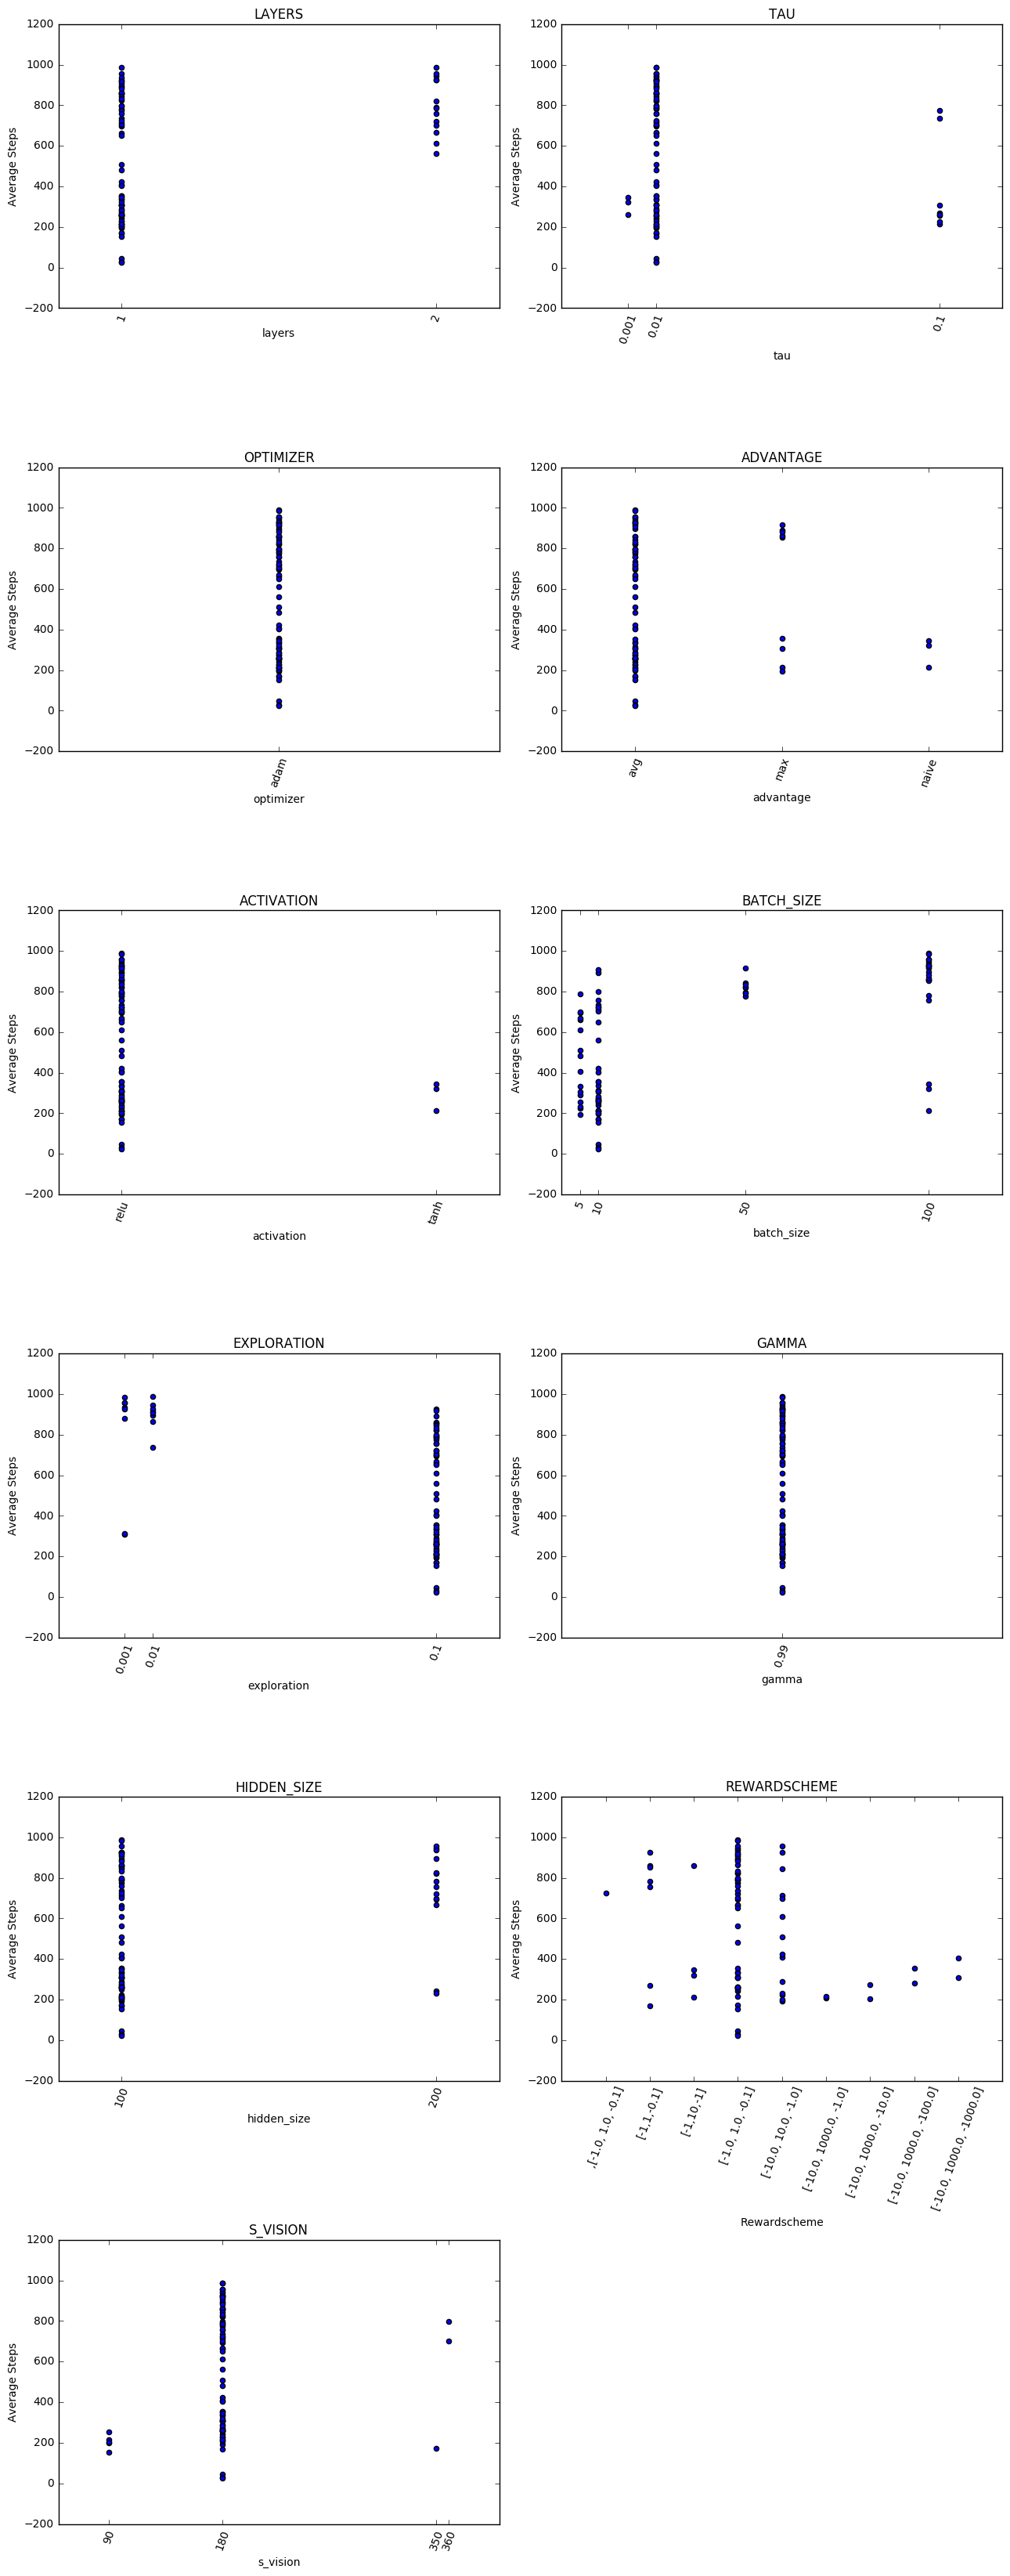

In [4]:

features = experiements.columns[[1,2,3,4,7,8,10,11,12,17,18]]
counter =1
plt.figure(figsize=(13,33))
for i in features:
    ax = plt.subplot(6,2,counter)
    counter+=1
    plotsomething(ax,i)
plt.tight_layout()

# Performance Check

In [1]:
import pstats
p = pstats.Stats('../program_hpc_100.prof')
p.sort_stats('tottime')
p.print_stats(10)

Wed Dec 21 10:45:28 2016    ../program_hpc_100.prof

         884626103 function calls (878210950 primitive calls) in 58080.068 seconds

   Ordered by: internal time
   List reduced from 6663 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
 13161463 49688.927    0.004 49688.927    0.004 {numpy.core.multiarray.array}
  7096957 4890.269    0.001 5312.256    0.001 /home/hpc_aqeel/miniconda3/envs/py2/lib/python2.7/site-packages/theano/compile/function_module.py:754(__call__)
        1 1017.561 1017.561 58080.105 58080.105 duel.py:1(<module>)
 77670076  452.820    0.000  452.820    0.000 {method 'reduce' of 'numpy.ufunc' objects}
8042889/1971400  181.281    0.000  378.942    0.000 FOV_Calculator.py:57(_cast_light)
 76890757  152.005    0.000  632.690    0.000 /home/hpc_aqeel/miniconda3/envs/py2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2200(amax)
 37603591  141.247    0.000  141.247    0.000 FOV_Calculator.py:31(blocked)
  6

<pstats.Stats instance at 0x7fe91c1ee950>

In [1]:
import pstats
p = pstats.Stats('../program_5.prof')
p.sort_stats('tottime')
p.print_stats(10)

Tue Dec 20 17:22:58 2016    ../program_5.prof

         142027739 function calls (141626717 primitive calls) in 589.548 seconds

   Ordered by: internal time
   List reduced from 7121 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   360983  221.413    0.001  221.413    0.001 {built-in method tensorflow.python._pywrap_tensorflow.TF_Run}
   694108   91.382    0.000   91.382    0.000 {built-in method numpy.core.multiarray.array}
        1   33.664   33.664  589.878  589.878 ../testcprofile/duel.py:1(<module>)
   360983   18.569    0.000  380.305    0.001 /home/aqeel/anaconda2/envs/py3/lib/python3.5/site-packages/tensorflow/python/client/session.py:563(_run)
  2960754   11.573    0.000   11.574    0.000 {method 'reduce' of 'numpy.ufunc' objects}
   360983   10.840    0.000   37.382    0.000 /home/aqeel/anaconda2/envs/py3/lib/python3.5/site-packages/tensorflow/python/client/session.py:510(_process_fetches)
23667210/23667208    9.915  

In [3]:
p = pstats.Stats('../program_5_no_DP.prof')
p.sort_stats('tottime')
p.print_stats(10)

Tue Dec 20 17:22:58 2016    ../program_5.prof

         142027739 function calls (141626717 primitive calls) in 589.548 seconds

   Ordered by: internal time
   List reduced from 7121 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   360983  221.413    0.001  221.413    0.001 {built-in method tensorflow.python._pywrap_tensorflow.TF_Run}
   694108   91.382    0.000   91.382    0.000 {built-in method numpy.core.multiarray.array}
        1   33.664   33.664  589.878  589.878 ../testcprofile/duel.py:1(<module>)
   360983   18.569    0.000  380.305    0.001 /home/aqeel/anaconda2/envs/py3/lib/python3.5/site-packages/tensorflow/python/client/session.py:563(_run)
  2960754   11.573    0.000   11.574    0.000 {method 'reduce' of 'numpy.ufunc' objects}
   360983   10.840    0.000   37.382    0.000 /home/aqeel/anaconda2/envs/py3/lib/python3.5/site-packages/tensorflow/python/client/session.py:510(_process_fetches)
23667210/23667208    9.915  